# Pymaceuticals Inc.
---

### Analysis
* Overall, it is clear that Capomulin is a viable drug regimen to reduce tumor growth.
* Capomulin had the most number of mice complete the study, with the exception of Remicane, all other regimens observed a number of mice deaths across the duration of the study. 
* There is a strong correlation between mouse weight and tumor volume, indicating that mouse weight may be contributing to the effectiveness of any drug regimen.
* There was one potential outlier within the Infubinol regimen. While most mice showed tumor volume increase, there was one mouse that had a reduction in tumor growth in the study. 

In [1]:
!pip install pandas

In [2]:
!pip install matplotlib

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

# Combine the data into a single dataset.
#study_results = study_results.dropna(axis=1)
#merge_mouse_study = mouse_methdata.merge(study_results, on = 'Mouse ID')
merge_mouse_study_df = pd.merge(mouse_metadata_df, study_results_df, on="Mouse ID")
merge_mouse_study_df.head()

# Display the data table for preview
#merge_mouse_study_df.to_csv("output.csv", index=False)
#merge_mouse_study_df.to_csv.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Checking the number of mice.

print (f'Number of mice:', merge_mouse_study_df['Mouse ID'].nunique())

Number of mice: 249


In [5]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
data_duplicate_mouse = merge_mouse_study_df.loc[merge_mouse_study_df.duplicated(subset=['Mouse ID', 'Timepoint']), 'Mouse ID'].unique()
data_duplicate_mouse

array(['g989'], dtype=object)

In [6]:
# Optional: Get all the data for the duplicate mouse ID. 
dat_dup_mouse = merge_mouse_study_df.loc[merge_mouse_study_df['Mouse ID'] == "g989", :]
dat_dup_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouseDF = merge_mouse_study_df[merge_mouse_study_df['Mouse ID'].isin(dat_dup_mouse) == False]
clean_mouseDF.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [8]:
# Checking the number of mice in the clean DataFrame.
print (f'Number of mice:', clean_mouseDF['Mouse ID'].nunique())

Number of mice: 249


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.
#data_1 = merge_mouse_study_df

mean_data=merge_mouse_study_df['Tumor Volume (mm3)'].groupby(merge_mouse_study_df['Drug Regimen']).mean()

median_data=merge_mouse_study_df['Tumor Volume (mm3)'].groupby(merge_mouse_study_df['Drug Regimen']).median()

var_data=merge_mouse_study_df['Tumor Volume (mm3)'].groupby(merge_mouse_study_df['Drug Regimen']).var()

std_data=merge_mouse_study_df['Tumor Volume (mm3)'].groupby(merge_mouse_study_df['Drug Regimen']).std()

sem_data=merge_mouse_study_df['Tumor Volume (mm3)'].groupby(merge_mouse_study_df['Drug Regimen']).sem()


#Create the table:
drugregimen_table = pd.DataFrame ({"Mean Tumor Volume": mean_data,
                                 "Median Tumor Volume": median_data,
                                 "Tumor Volume Variance": var_data,
                                 "Tumor Volume Std. Dev.": std_data,
                                 "Tumor Volume Std. Err.": sem_data})


drugregimen_table

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [ ]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen



# Using the aggregation method, produce the same summary statistics in a single line.




## Bar and Pie Charts

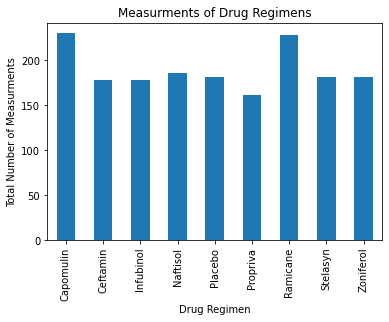

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.
drug_groups = merge_mouse_study_df.groupby('Drug Regimen')

measurments_ = drug_groups['Mouse ID'].count()
measurments_

#or 

#merge_mouse_study_df['Mouse ID'].value_counts()

measurments_ = measurments_.drop(measurments_.index[3])

measurments_chart = measurments_.plot(kind="bar", title="Measurments of Drug Regimens")
measurments_chart.set_xlabel("Drug Regimen")
measurments_chart.set_ylabel("Total Number of Measurments")

plt.show()
plt.tight_layout()


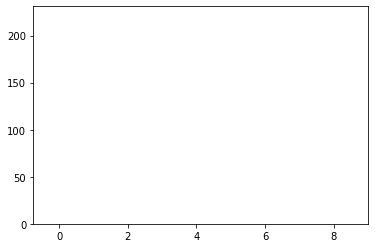

In [51]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using using pyplot.
drug_groups = merge_mouse_study_df.groupby('Drug Regimen')
measurments_ = drug_groups['Mouse ID'].count()
measurments_

#Data Set
x_axis = measurments_
y_axis = drug_groups

#plt.bar=(drug_groups, measurments_)
plt.title = ('Measurments of Drug Regimens')
plt.xlabel = ('Drug Regimen')
plt.ylabel = ('Total Number of Measurments')

plt.xlim(-0.75, len(drug_groups)- 1)
plt.ylim(0, max(measurments_) + 1)

plt.bar(x_axis, measurments_, facecolor="red", alpha = 0.75, align = "center")
#plt.xticks(tick_locations, drug_groups)
plt.show()

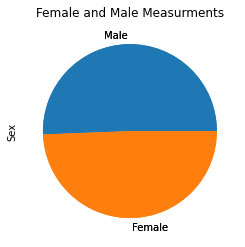

In [17]:
# Generate a pie plot showing the distribution of female versus male mice using pandas.

sex = ['Male', 'Female']
sex_count = merge_mouse_study_df['Sex'].value_counts()
pie_chart = sex_count.plot(kind="pie")



mf_pie = sex_count.plot(kind="pie", y='Sex', title=("Female and Male Measurments"))
plt.ylabel("Sex")


plt.show()



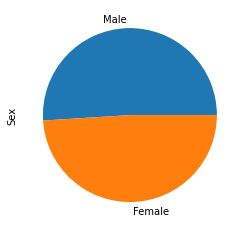

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

sex = ['Male', 'Female']
sex_count = [51, 49]

fig = plt.figure
plt.pie(sex_count, labels = sex)

plt.ylabel("Sex")

plt.show()


## Quartiles, Outliers and Boxplots

In [25]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

#data['Timepoint'] =  merge_mouse_study_df['Timepoint'].astype(float)
#data =  merge_mouse_study_df['Timepoint'].astype(float)

capomulin_data = merge_mouse_study_df.loc[merge_mouse_study_df['Drug Regimen'] =='Capomulin',:]
ramicane_data = merge_mouse_study_df.loc[merge_mouse_study_df['Drug Regimen'] =='Ramicane',:]
infubinol_data = merge_mouse_study_df.loc[merge_mouse_study_df['Drug Regimen'] =='Infubinol',:]
ceftamin_data = merge_mouse_study_df.loc[merge_mouse_study_df['Drug Regimen'] =='Ceftamin',:]

# Start by getting the last (greatest) timepoint for each mouse.
greatest_capomulin_data = capomulin_data.groupby('Mouse ID').max()['Timepoint']
greatest_ramicane_data = ramicane_data.groupby('Mouse ID').max()['Timepoint']
greatest_infubinol_data = infubinol_data.groupby('Mouse ID').max()['Timepoint']
greatest_ceftamin_data = ceftamin_data.groupby('Mouse ID').max()['Timepoint']

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
capomulin_df = pd.DataFrame(greatest_capomulin_data)
ramicane_df = pd.DataFrame(greatest_ramicane_data)
infubinol_df = pd.DataFrame(greatest_infubinol_data)
ceftamin_df = pd.DataFrame(greatest_ceftamin_data)

capomulin_merge = pd.merge(capomulin_df, merge_mouse_study_df, on = ("Mouse ID", "Timepoint"), how = "left")
ramicane_merge = pd.merge(ramicane_df, merge_mouse_study_df, on = ("Mouse ID", "Timepoint"), how = "left")
infubinol_merge = pd.merge(infubinol_df, merge_mouse_study_df, on = ("Mouse ID", "Timepoint"), how = "left")
ceftamin_merge = pd.merge(ceftamin_df, merge_mouse_study_df, on = ("Mouse ID", "Timepoint"), how = "left")


In [30]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = [vol for vol in merge_mouse_study_df['Tumor Volume (mm3)']]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
capomulin_tumors = capomulin_merge['Tumor Volume (mm3)']
ramicane_tumors = ramicane_merge['Tumor Volume (mm3)']
infubinol_tumors = infubinol_merge['Tumor Volume (mm3)']
ceframin_tumors = ceftamin_merge['Tumor Volume (mm3)']
    
# Locate the rows which contain mice on each drug and get the tumor volumes
# add subset  
# Determine outliers using upper and lower bounds

#C = CAPOMULIN
c_quartiles = capomulin_tumors.quantile([.25, .5, .75])
c_lowerqt = c_quartiles[.25]
c_upperqt = c_quartiles[.75]
c_iqr = c_upperqt-c_lowerqt
c_lower_bound = c_lowerqt - (1.5*c_iqr)
c_upper_bound = c_upperqt + (1.5*c_iqr)
    
#R = RAMICANE
r_quartiles = ramicane_tumors.quantile([.25, .5, .75])
r_lowerqt = r_quartiles[.25]
r_upperqt = r_quartiles[.75]
r_iqr = r_upperqt-r_lowerqt
r_lower_bound = r_lowerqt - (1.5*r_iqr)
r_upper_bound = r_upperqt + (1.5*r_iqr)

#i = INFUBINOL
i_quartiles = infubinol_tumors.quantile([.25, .5, .75])
i_lowerqt = i_quartiles[.25]
i_upperqt = i_quartiles[.75]
i_iqr = i_upperqt-i_lowerqt
i_lower_bound = i_lowerqt - (1.5*i_iqr)
i_upper_bound = i_upperqt + (1.5*i_iqr)

#CE-CEFRAMIN
ce_quartiles = ceframin_tumors.quantile([.25, .5, .75])
ce_lowerqt = ce_quartiles[.25]
ce_upperqt = ce_quartiles[.75]
ce_iqr = ce_upperqt-ce_lowerqt
ce_lower_bound = ce_lowerqt - (1.5*ce_iqr)
ce_upper_bound = ce_upperqt + (1.5*ce_iqr)
    
    

print(f"Capomulin")
print(f"Lower quartile of Capomulin tumors = {c_lowerqt}")
print(f"Upper quartile of Capomulin tumors = {c_upperqt}")
print(f"Interquartile range of Capomulin tumors = {c_iqr}")
print(f"Values below {c_lower_bound} could be outliers.")
print(f"Values above {c_upper_bound} could be outliers.")

print(f"Ramicane")
print(f"Lower quartile of Ramicane tumors = {r_lowerqt}")
print(f"Upper quartile of Ramicane tumors = {r_upperqt}")
print(f"Interquartile range of Ramicane tumors = {r_iqr}")
print(f"Values below {r_lower_bound} could be outliers.")
print(f"Values above {r_upper_bound} could be outliers.")

print(f"Infubinol")
print(f"Lower quartile of Infubinol tumors = {i_lowerqt}")
print(f"Upper quartile of Infubinol tumors = {i_upperqt}")
print(f"Interquartile range of Infubinol tumors = {i_iqr}")
print(f"Values below {i_lower_bound} could be outliers.")
print(f"Values above {i_upper_bound} could be outliers.")

print(f"Ceframin")
print(f"Lower quartile of Ceframin tumors = {ce_lowerqt}")
print(f"Upper quartile of Ceframin tumors = {ce_upperqt}")
print(f"Interquartile range of Ceframin tumors = {ce_iqr}")
print(f"Values below {ce_lower_bound} could be outliers.")
print(f"Values above {ce_upper_bound} could be outliers.")


Capomulin
Lower quartile of Capomulin tumors = 32.37735684
Upper quartile of Capomulin tumors = 40.1592203
Interquartile range of Capomulin tumors = 7.781863460000004
Values below 20.70456164999999 could be outliers.
Values above 51.83201549 could be outliers.
Ramicane
Lower quartile of Ramicane tumors = 31.56046955
Upper quartile of Ramicane tumors = 40.65900627
Interquartile range of Ramicane tumors = 9.098536719999998
Values below 17.912664470000003 could be outliers.
Values above 54.30681135 could be outliers.
Infubinol
Lower quartile of Infubinol tumors = 54.04860769
Upper quartile of Infubinol tumors = 65.52574285
Interquartile range of Infubinol tumors = 11.477135160000003
Values below 36.83290494999999 could be outliers.
Values above 82.74144559000001 could be outliers.
Ceframin
Lower quartile of Ceframin tumors = 48.72207785
Upper quartile of Ceframin tumors = 64.29983003
Interquartile range of Ceframin tumors = 15.577752179999997
Values below 25.355449580000002 could be outli

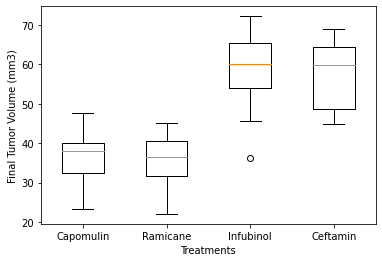

In [36]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest.
#means = [s.MEDV.mean() for s in samples]


boxplot_treatments = [capomulin_tumors, ramicane_tumors, infubinol_tumors, ceframin_tumors]
labels_treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

fig, ax1 = plt.subplots()

plt.boxplot(boxplot_treatments, labels=labels_treatments, widths=.5, notch=False, vert=True)
#ax1.set_xlim(0, len(means)+1)
ax1.set_xlabel("Treatments") 
ax1.set_ylabel("Final Tumor Volume (mm3)")


#plt.grid()
plt.show()

## Line and Scatter Plots

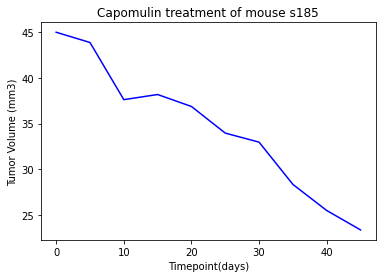

In [49]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin.
mouse_tdata = capomulin_data.loc[capomulin_data['Mouse ID'] == "s185",:]

days= mouse_tdata["Timepoint"]
tvolume = mouse_tdata["Tumor Volume (mm3)"]

fig1, ax1 = plt.subplots()
plt.plot(days, tvolume, color="blue")

plt.title("Capomulin treatment of mouse s185")
plt.xlabel("Timepoint(days)")
#plt.xticks(np.arange(min(days), max(days)+1, 1.0))
plt.ylabel("Tumor Volume (mm3)")

plt.show()


TypeError: 'str' object is not callable

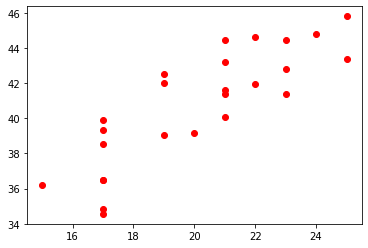

In [65]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
fig1, ax1 = plt.subplots()
#Where do u get data?
tumor_data = capomulin_data.groupby(['Mouse ID']).mean()
#x_values = ["Weight (g)"] 
#y_values = ["Tumor Volume (mm3)"] 
marker_size=20
plt.scatter(tumor_data['Weight (g)'],tumor_data['Tumor Volume (mm3)'], color = "red") 
#Find correct name of merge of datas.
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.show()



## Correlation and Regression

In [6]:
# Calculate the correlation coefficient and linear regression model.
# for mouse weight and average tumor volume for the Capomulin regimen.
#corr_model = st.linregress(capomulin_average['Weight (g)'],capomulin_average['Tumor Volume (mm3)'])

#x_values = capomulin_data["Weight (g)"] #Weight
#y_values = capomulin_data["Tumor Volume (mm3)"] #Avg tumor volume WHERE IS AVG TUMOR VOLUME?
#      (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
#regress_values = x_values * slope + intercept
#    line_eq = "y = " + str(round(slope,2)) + "x +" +str(round(incept,2))
#plt.scatter(x_values, y_values)
#plt.plot(x_values, regress_values, "r-")
#plt.annotate(line_eq,(6,10), fontsize = 15, color="red")
#plt.xlabel('Weight (g)')
#plt.ylabel('Average Tumor Volume (mm3)')
#plt.show()

NameError: name 'st' is not defined